### login

In [1]:
from truedata_ws.websocket.TD import TD
td_obj = TD('FYERS872', 'fjt3KN3s',live_port=None)


(2021-06-13 12:27:01,090) WARNING :: Connected successfully to TrueData Historical Data Service...  (PID:14764 Thread:139646891611968)


### get historical data

In [61]:
hist_data_2 = td_obj.get_historic_data('NIFTY-I', duration='3 D',bar_size="2 min")

### convert data to pandas dataframe

In [62]:
import pandas as pd

df=pd.DataFrame(hist_data_2)
df

,time,o,h,l,c,v,oi
0,2021-06-11 09:14:00,15809.00,15819.85,15791.15,15804.90,174450,11298450
1,2021-06-11 09:16:00,15805.00,15822.00,15805.00,15819.90,165750,11461725
2,2021-06-11 09:18:00,15818.65,15822.00,15812.55,15817.70,86925,11461725
3,2021-06-11 09:20:00,15820.50,15824.90,15819.25,15822.00,108000,11529450
4,2021-06-11 09:22:00,15821.05,15830.00,15820.75,15827.00,89325,11585850
...,...,...,...,...,...,...,...
183,2021-06-11 15:20:00,15817.90,15821.00,15815.10,15817.70,79875,12036450
184,2021-06-11 15:22:00,15818.95,15820.60,15816.05,15819.00,57600,12036450
185,2021-06-11 15:24:00,15818.00,15823.00,15817.50,15821.25,87675,12034725
186,2021-06-11 15:26:00,15822.00,15824.40,15820.00,15823.20,75600,12018900


In [97]:
df[["time","c","v","oi"]]
all_dfs=[]
all_dfs.append(df[["time","c","v","oi"]])
[d.set_index("time") for d in all_dfs]

[                            c       v        oi
 time                                           
 2021-06-11 09:14:00  15804.90  174450  11298450
 2021-06-11 09:16:00  15819.90  165750  11461725
 2021-06-11 09:18:00  15817.70   86925  11461725
 2021-06-11 09:20:00  15822.00  108000  11529450
 2021-06-11 09:22:00  15827.00   89325  11585850
 ...                       ...     ...       ...
 2021-06-11 15:20:00  15817.70   79875  12036450
 2021-06-11 15:22:00  15819.00   57600  12036450
 2021-06-11 15:24:00  15821.25   87675  12034725
 2021-06-11 15:26:00  15823.20   75600  12018900
 2021-06-11 15:28:00  15821.15   91350  12018900
 
 [188 rows x 3 columns]]

### plotting graph

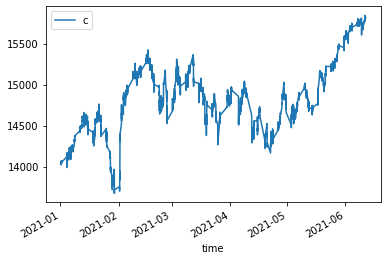

In [55]:
import matplotlib.pyplot as plt

df.plot(x="time",y="c")

### finding expiry date

In [56]:
from datetime import datetime , timedelta
from dateutil.relativedelta import relativedelta, TH

end_of_month = datetime.today() + relativedelta(day=31)
last_thursday = end_of_month + relativedelta(weekday=TH(-1))
expiry_date=last_thursday.strftime("%Y%m%d")

expiry_date

'20210624'

### finding options chain

In [57]:
import requests 

option_chain=pd.read_csv('https://api.truedata.in/getOptionChain?user=FYERS872&password=fjt3KN3s&symbol=NIFTY&expiry=20210624&csv=true',names=["id","symbol","type","empty","exchange","something","strike","expiry","symbol2","symbol3"])
option_chain

,id,symbol,type,empty,exchange,something,strike,expiry,symbol2,symbol3
0,300009510,NIFTY21062410000CE,CE,NaN,NSE,75,10000,6/24/2021,NIFTY21F110000,NIFTY21062410000CE
1,300009511,NIFTY21062410000PE,PE,NaN,NSE,75,10000,6/24/2021,NIFTY21R110000,NIFTY21062410000PE
2,300009512,NIFTY21062410100CE,CE,NaN,NSE,75,10100,6/24/2021,NIFTY21F110100,NIFTY21062410100CE
3,300009513,NIFTY21062410100PE,PE,NaN,NSE,75,10100,6/24/2021,NIFTY21R110100,NIFTY21062410100PE
4,300009514,NIFTY21062410200CE,CE,NaN,NSE,75,10200,6/24/2021,NIFTY21F110200,NIFTY21062410200CE
...,...,...,...,...,...,...,...,...,...,...
333,300009501,NIFTY2106249700PE,PE,NaN,NSE,75,9700,6/24/2021,NIFTY210R19700,NIFTY2106249700PE
334,300009502,NIFTY2106249800CE,CE,NaN,NSE,75,9800,6/24/2021,NIFTY210F19800,NIFTY2106249800CE
335,300009503,NIFTY2106249800PE,PE,NaN,NSE,75,9800,6/24/2021,NIFTY210R19800,NIFTY2106249800PE
336,300009508,NIFTY2106249900CE,CE,NaN,NSE,75,9900,6/24/2021,NIFTY210F19900,NIFTY2106249900CE


In [74]:
percent_strikes=10
ltp=13821
strikes = option_chain.query('strike>(1-(@percent_strikes/100))*@ltp and strike<(1+ (@percent_strikes/100))*@ltp')
strikes = option_chain.query('strike>14200 and strike<17403')

print(strikes)



            id              symbol type  empty exchange  something  strike  \
114  300322285  NIFTY21062414250CE   CE    NaN      NSE         75   14250   
115  300322286  NIFTY21062414250PE   PE    NaN      NSE         75   14250   
116  300013635  NIFTY21062414300CE   CE    NaN      NSE         75   14300   
117  300013636  NIFTY21062414300PE   PE    NaN      NSE         75   14300   
118  300322287  NIFTY21062414350CE   CE    NaN      NSE         75   14350   
..         ...                 ...  ...    ...      ...        ...     ...   
233  300396738  NIFTY21062417200PE   PE    NaN      NSE         75   17200   
234  300397643  NIFTY21062417250CE   CE    NaN      NSE         75   17250   
235  300397644  NIFTY21062417250PE   PE    NaN      NSE         75   17250   
236  300399240  NIFTY21062417300CE   CE    NaN      NSE         75   17300   
237  300399241  NIFTY21062417300PE   PE    NaN      NSE         75   17300   

        expiry         symbol2             symbol3  
114  6/24/

In [85]:
def get_hist_data(symbol="NIFTY-I", duration="3 d", bar_size="2 min"):
    hist_data = td_obj.get_historic_data(symbol, duration='3 d',bar_size="2 min")
    return pd.DataFrame(hist_data)

pdp=get_hist_data(symbol="NIFTY21062415400PE",bar_size="5 min")
pdc=get_hist_data(symbol="NIFTY21062415400CE",bar_size="5 min")
pdc2=get_hist_data(symbol="NIFTY21062415900CE",bar_size="5 min")
pdp2=get_hist_data(symbol="NIFTY21062415900PE",bar_size="5 min")

pdp.set_index("time",inplace=True)
pdc.set_index("time",inplace=True)
pdp2.set_index("time",inplace=True)
pdc2.set_index("time",inplace=True)


In [91]:

#pd.merge(pdc,pdp,how="inner",left_index=True, right_index=True)
dfs=[pdc,pdp,pdc2,pdp2]
pd.concat(dfs,keys=["NIFTY21062415400CE","NIFTY21062415400PE","NIFTY21062415900CE","NIFTY21062415900PE"],join="inner",axis=1)

NIFTY21062415400CE                                         \
                                     o       h       l       c      v      oi   
time                                                                            
2021-06-11 09:14:00             451.35  451.35  443.10  443.10    825  508050   
2021-06-11 09:16:00             444.65  458.85  444.65  454.95   2475  507600   
2021-06-11 09:18:00             461.85  461.85  456.00  457.80   1575  507600   
2021-06-11 09:20:00             460.00  462.25  458.20  461.55  14175  507075   
2021-06-11 09:22:00             461.00  466.00  461.00  465.00    975  507075   
...                                ...     ...     ...     ...    ...     ...   
2021-06-11 15:20:00             450.60  452.85  450.60  452.85    450  540750   
2021-06-11 15:22:00             452.05  452.60  451.85  452.60    525  540525   
2021-06-11 15:24:00             452.00  454.40  451.35  451.55   1500  539700   
2021-06-11 15:26:00             453.35  455.30  453.35  454.20   1650  539100   
2021-06-11 15:28:00             454.95  455.00  454.30  454.30    225  539100   

                    NIFTY21062415400PE                       ...  \
                                     o      h      l      c  ...   
time                                                         ...   
2021-06-11 09:14:00              44.15  50.70  44.15  47.05  ...   
2021-06-11 09:16:00              47.30  47.35  44.30  44.30  ...   
2021-06-11 09:18:00              44.50  45.80  44.35  45.00  ...   
2021-06-11 09:20:00              44.75  45.00  43.80  44.00  ...   
2021-06-11 09:22:00              44.00  44.30  43.30  43.65  ...   
...                                ...    ...    ...    ...  ...   
2021-06-11 15:20:00              38.80  39.15  38.35  38.75  ...   
2021-06-11 15:22:00              38.55  38.60  38.00  38.00  ...   
2021-06-11 15:24:00              38.20  38.35  37.60  37.85  ...   
2021-06-11 15:26:00              37.80  37.85  37.15  37.30  ...   
2021-06-11 15:28:00              37.30  37.40  36.50  36.50  ...   

                    NIFTY21062415900CE                          \
                                     l       c      v       oi   
time                                                             
2021-06-11 09:14:00              97.45  108.55  28425  1004475   
2021-06-11 09:16:00             108.05  114.80  69750  1006800   
2021-06-11 09:18:00             112.45  115.00  46200  1006800   
2021-06-11 09:20:00             114.65  115.50  66975  1008900   
2021-06-11 09:22:00             114.80  119.05  48075  1035750   
...                                ...     ...    ...      ...   
2021-06-11 15:20:00             103.95  104.25  16350  1095450   
2021-06-11 15:22:00             104.00  104.70  23175  1095450   
2021-06-11 15:24:00             104.25  104.70  77400  1100025   
2021-06-11 15:26:00             104.75  105.70  17625  1099050   
2021-06-11 15:28:00             105.15  105.40  27000  1099050   

                    NIFTY21062415900PE                                         
                                     o       h       l       c      v      oi  
time                                                                           
2021-06-11 09:14:00             210.50  229.70  204.10  207.00  10050  155775  
2021-06-11 09:16:00             207.35  207.70  197.20  199.20  11175  160350  
2021-06-11 09:18:00             198.85  202.55  197.65  200.00   9900  160350  
2021-06-11 09:20:00             197.55  200.00  196.25  196.75  14475  166800  
2021-06-11 09:22:00             198.00  198.00  193.85  196.05  22800  176625  
...                                ...     ...     ...     ...    ...     ...  
2021-06-11 15:20:00             190.35  191.45  188.75  189.60   7875  236700  
2021-06-11 15:22:00             189.65  190.00  188.15  188.80   6000  236700  
2021-06-11 15:24:00             188.95  189.40  187.05  187.95   9675  237525  
2021-06-11 15:26:00             187.05  187.45 